<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/36_SimonAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-_unvyyba
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-_unvyyba
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 85ba91fef057a425cd2cb7ce58999e9334b75f4c
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.1 MB/s eta 0:00:00
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17557 sha256=0f6d8231bfaeff456102a085385b1cd8ada50bcf3fe848d2da136cfa50a7d306
  Stored in directory: /tmp/pip-ephem-wheel-cache-l1oyhf7b/wheels/80/c4/dd/b7ea1ee2a7247e8997db78bc777bbe22e61ab1e5ed1c4b46e1
Successfully built qiskit-textbook


In [ ]:
s = '1111'

In [ ]:
n = len(s)

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(2*n)
c = ClassicalRegister(2*n)
qc = QuantumCircuit(q,c)

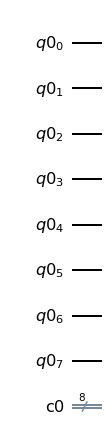

In [ ]:
qc.draw('mpl')

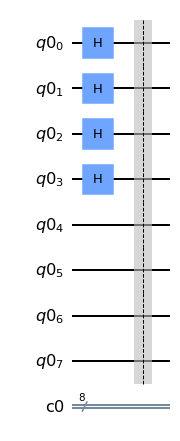

In [ ]:
for i in range(n):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

In [ ]:
from qiskit_textbook.tools import simon_oracle

In [ ]:
qc = qc.compose(simon_oracle(s))

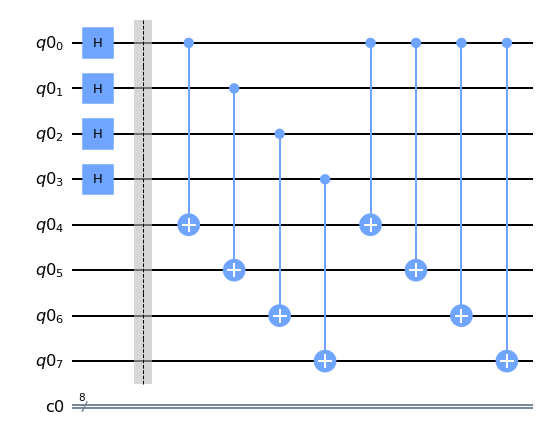

In [ ]:
qc.draw('mpl')

In [ ]:
qc.barrier()

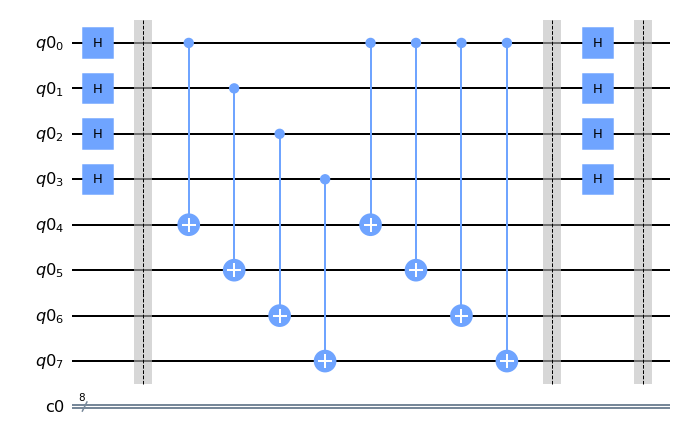

In [ ]:
for i in range(n):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

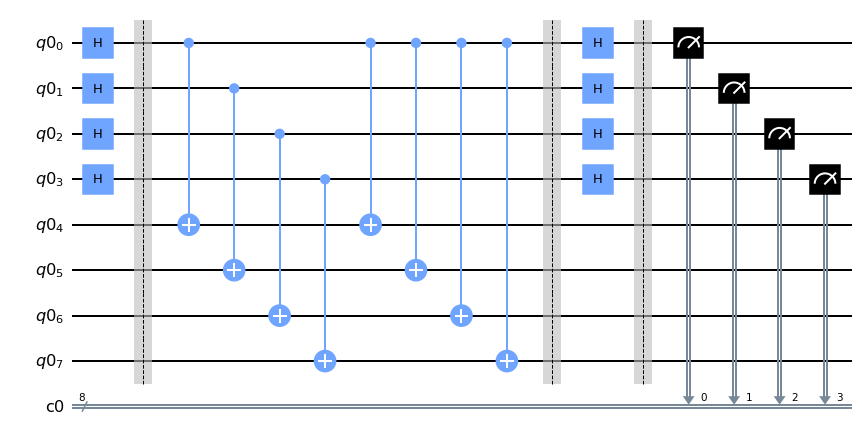

In [ ]:
for i in range(n):
    qc.measure(q[i],c[i])
qc.draw('mpl')

{'00001001': 161, '00000101': 131, '00001100': 111, '00001111': 115, '00001010': 131, '00000011': 113, '00000000': 123, '00000110': 139}


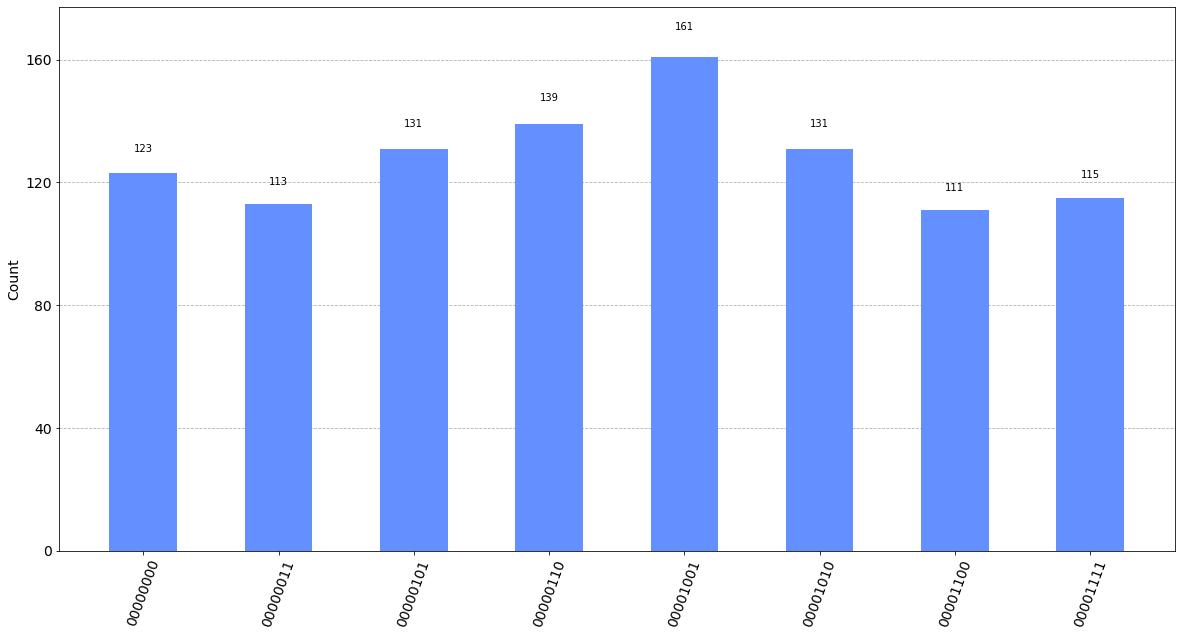

In [ ]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,10))

In [ ]:
from qiskit.test.mock import FakeJohannesburg
device_simulator = FakeJohannesburg()

<ipython-input-16-8d0b6941328a>:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeJohannesburg


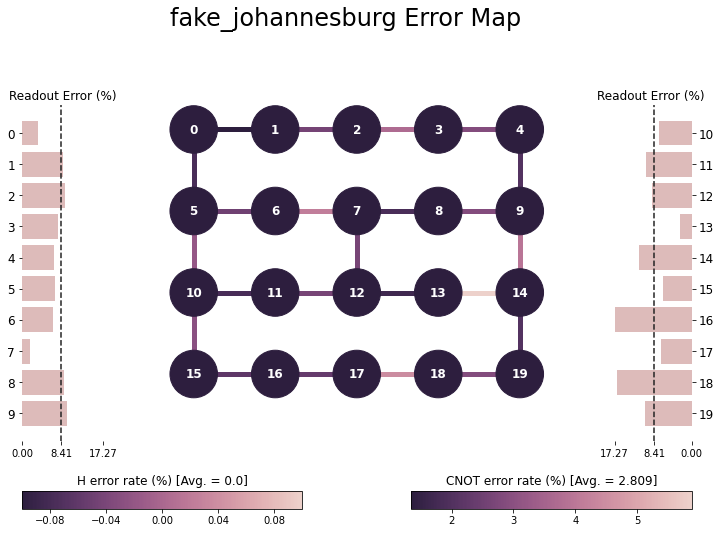

In [ ]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)

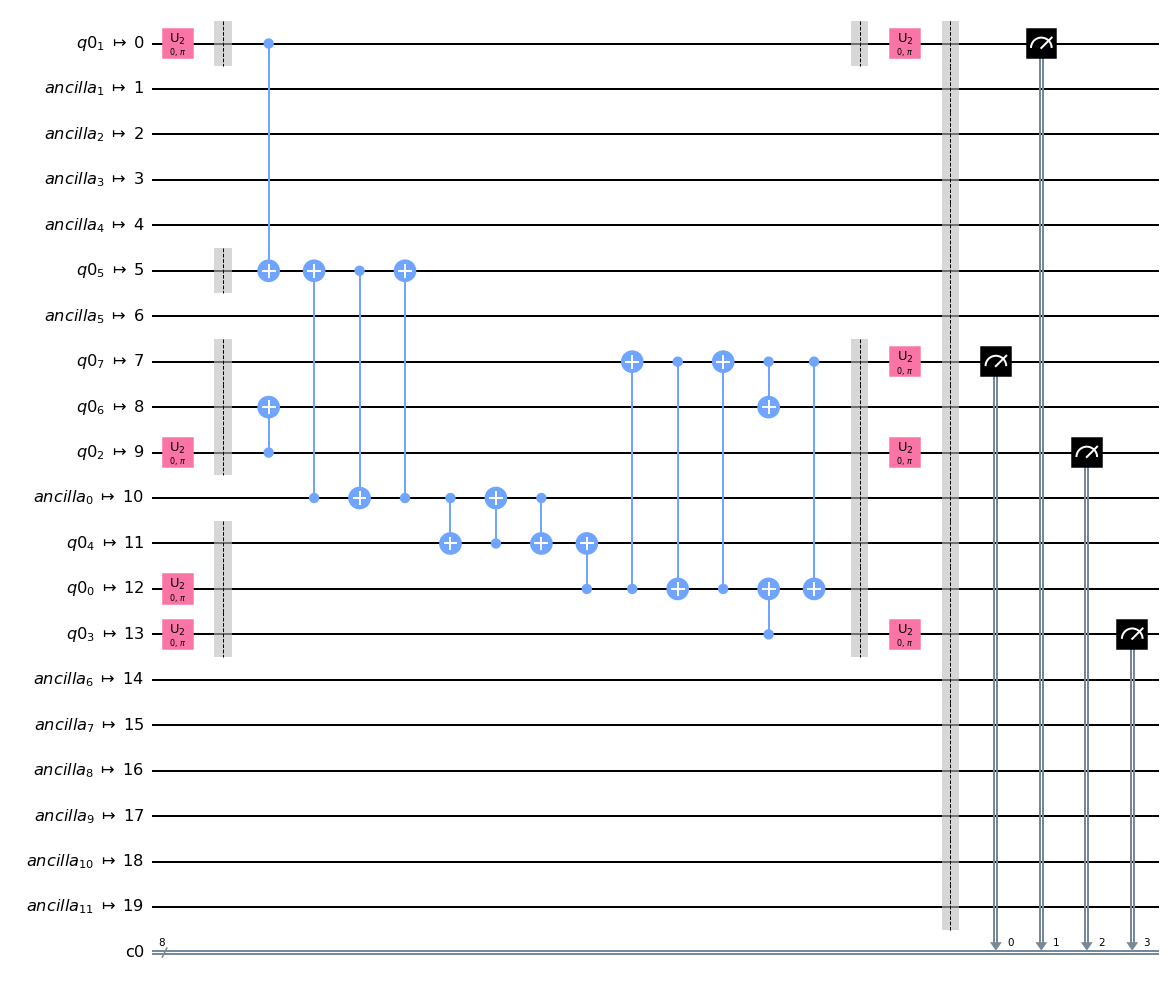

In [ ]:
qc2 = transpile(qc,device_simulator)
qc2.draw('mpl')

{'00001000': 46, '00001011': 34, '00000010': 53, '00001110': 54, '00001001': 72, '00000100': 46, '00000110': 82, '00001101': 35, '00000001': 42, '00000111': 51, '00000011': 81, '00000000': 81, '00001010': 72, '00001111': 93, '00000101': 102, '00001100': 80}


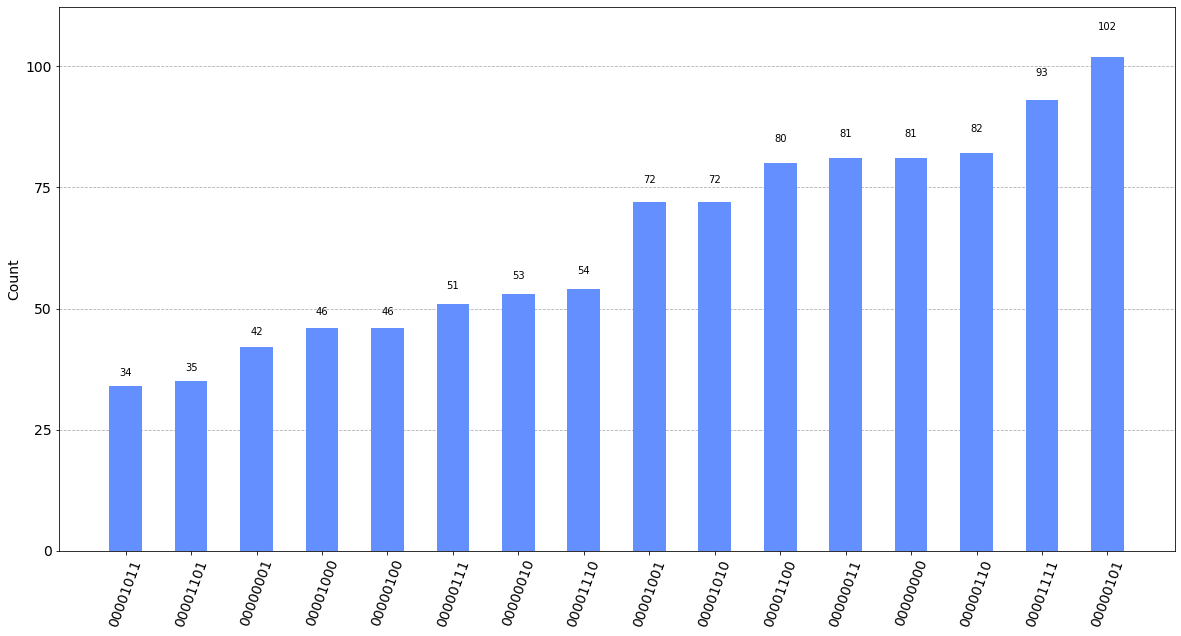

In [ ]:
job = device_simulator.run(qc2,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,10),sort = 'value')